<a href="https://colab.research.google.com/github/saivaishnav21/LabAssign/blob/main/labassign4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
 [[9101   10]
 [  34 3340]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9111
           1       1.00      0.99      0.99      3374

    accuracy                           1.00     12485
   macro avg       1.00      0.99      1.00     12485
weighted avg       1.00      1.00      1.00     12485

MSE: 0.0031059493614559695, RMSE: 0.05573104486241012, R2 Score: 0.9842507332325167


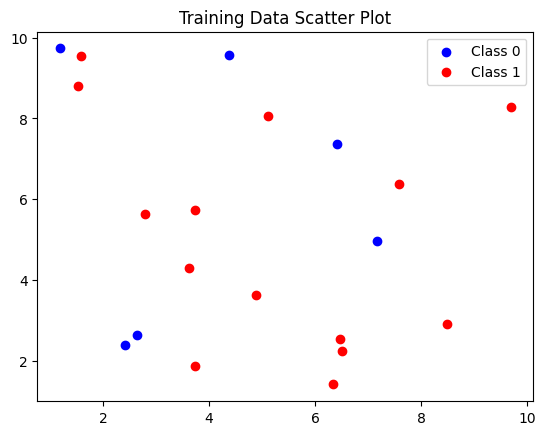

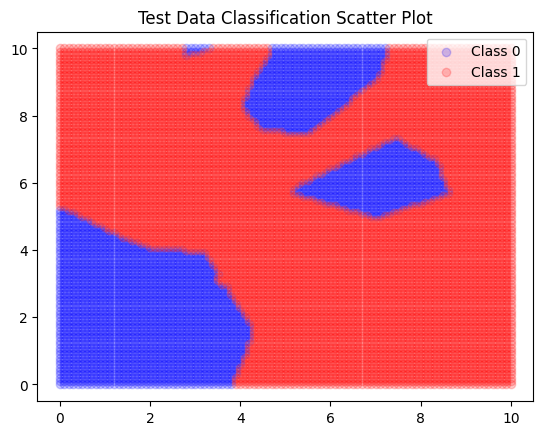

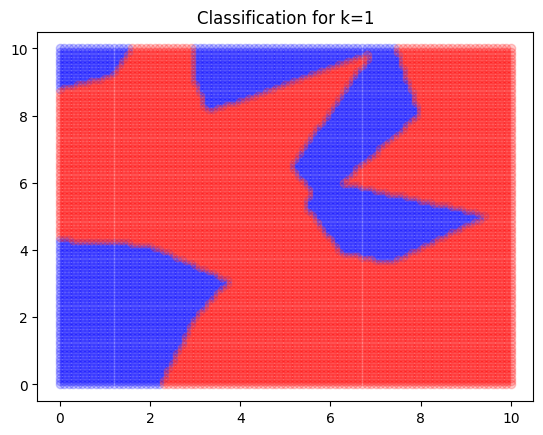

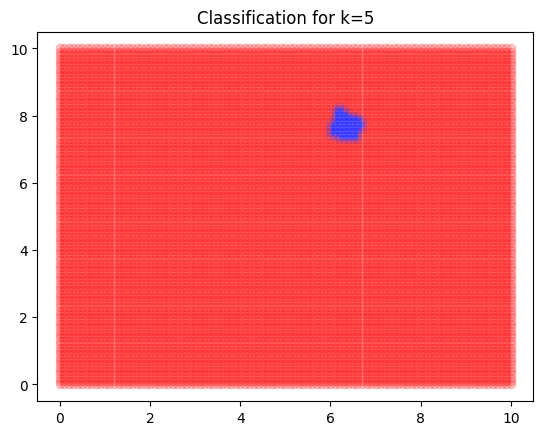

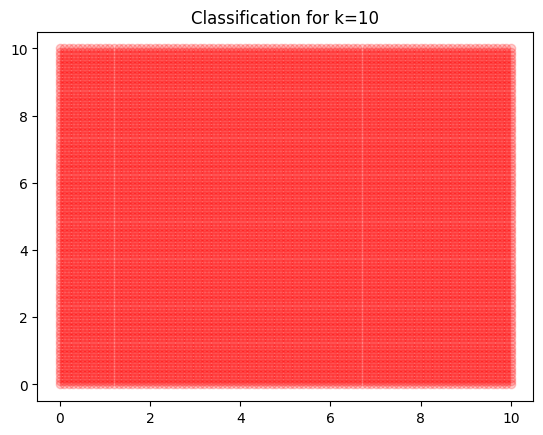

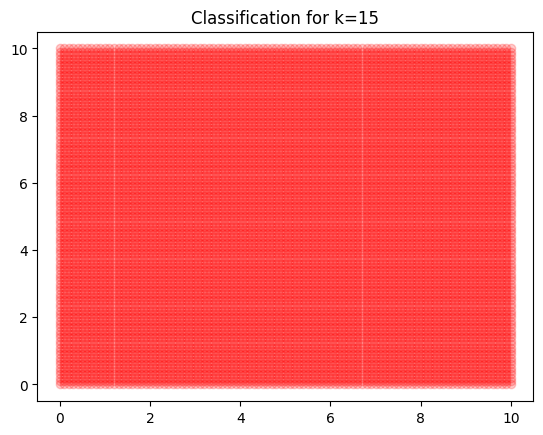

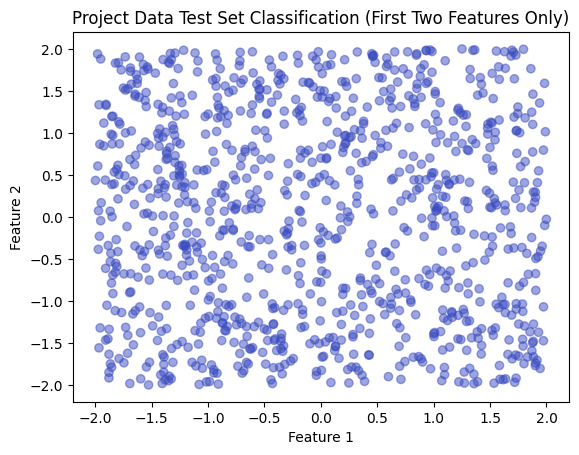

Best k value: 1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Mount Google Drive (if using Drive)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/Lab4ML/movies.xlsx'
df = pd.read_excel(file_path)

# One-hot encode genres
unique_genres = set("|".join(df["genres"].dropna()).split("|"))
for genre in unique_genres:
    df[genre] = df["genres"].str.contains(genre, regex=False).astype(int)

# Select features and target
features = list(unique_genres)  # All genres as features
target = "Comedy"  # Predicting whether a movie belongs to the Comedy genre

X = df[features]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# A1: Compute Confusion Matrix and Performance Metrics
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# A2: Regression Metrics (Using classification probabilities instead)
y_train_proba = knn.predict_proba(X_train_scaled)[:, 1]
y_test_proba = knn.predict_proba(X_test_scaled)[:, 1]

mse = mean_squared_error(y_test, y_test_proba)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_proba)

print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# A3: Generate Random Training Data and Scatter Plot
np.random.seed(42)
X_train_rand = np.random.uniform(1, 10, (20, 2))
y_train_rand = np.random.choice([0, 1], 20)

plt.scatter(X_train_rand[y_train_rand == 0, 0], X_train_rand[y_train_rand == 0, 1], color="blue", label="Class 0")
plt.scatter(X_train_rand[y_train_rand == 1, 0], X_train_rand[y_train_rand == 1, 1], color="red", label="Class 1")
plt.legend()
plt.title("Training Data Scatter Plot")
plt.show()

# A4: Generate Test Data and Classify
X_test_rand = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])
knn.fit(X_train_rand, y_train_rand)
y_test_rand_pred = knn.predict(X_test_rand)

plt.scatter(X_test_rand[y_test_rand_pred == 0, 0], X_test_rand[y_test_rand_pred == 0, 1], color="blue", alpha=0.2, label="Class 0")
plt.scatter(X_test_rand[y_test_rand_pred == 1, 0], X_test_rand[y_test_rand_pred == 1, 1], color="red", alpha=0.2, label="Class 1")
plt.legend()
plt.title("Test Data Classification Scatter Plot")
plt.show()

# A5: Experiment with different values of k
k_values = [1, 5, 10, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rand, y_train_rand)
    y_test_rand_pred = knn.predict(X_test_rand)

    plt.scatter(X_test_rand[y_test_rand_pred == 0, 0], X_test_rand[y_test_rand_pred == 0, 1], color="blue", alpha=0.2)
    plt.scatter(X_test_rand[y_test_rand_pred == 1, 0], X_test_rand[y_test_rand_pred == 1, 1], color="red", alpha=0.2)
    plt.title(f"Classification for k={k}")
    plt.show()

# A6
# Select the first 20 training samples (same number of features as full dataset)
X_project_train = X_train_scaled[:20]
y_project_train = y_train[:20]

# Generate test data with 20 features (same as training set)
X_project_test = np.random.uniform(-2, 2, (1000, X_project_train.shape[1]))

# Train and predict
knn.fit(X_project_train, y_project_train)
y_project_test_pred = knn.predict(X_project_test)

# Visualizing only first two features (since we can't visualize 20D data)
plt.scatter(X_project_test[:, 0], X_project_test[:, 1], c=y_project_test_pred, cmap="coolwarm", alpha=0.5)
plt.title("Project Data Test Set Classification (First Two Features Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



# A7: Hyperparameter tuning using GridSearchCV
param_grid = {"n_neighbors": range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best k value:", grid_search.best_params_["n_neighbors"])
